# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
#하나의 특성을 사용하기에 특성데이터를 x로놓고 타깃데이터를 y에 놓는다. 멧플롯립을 임포트하고 scatter()함수로 산점도를 그린다.     

In [3]:
import matplotlib.pyplot as plt

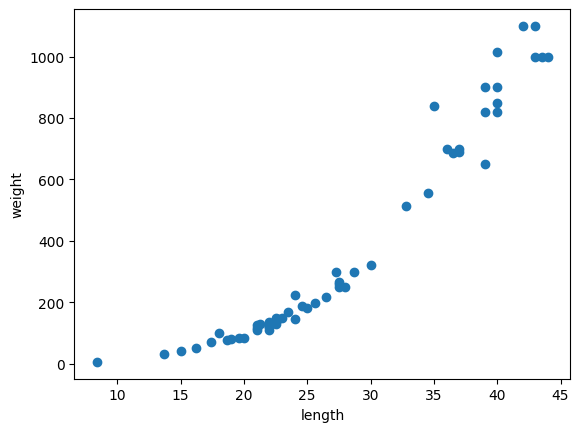

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
#훈련,테스트세트로 나눈다 그릭 책정결과를 동일하게 유지하기위해 random_statefmf 42로 정한다

In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


사이킷런에 필요한 훈련세트는 2차원 배열이여야 하기에 test_array는(4,)배열인것을 확인하고 reshape를 사용해 (2,2)크기로 바꾼다다

In [14]:
test_array = test_array.reshape(2, 2)#reshape()메서드를 사용할떄 원본배열의 원소갯수와 지정한 크기가 다르면 에러가 생긴다
print(test_array.shape)

(2, 2)


In [15]:
train_input = train_input.reshape(-1, 1)#넘파이 배열에서 크기에 -1을 지정하면 나머지 원소개수로 다 채우라는 뜻이된다
test_input = test_input.reshape(-1, 1)

In [16]:
print(train_input.shape, test_input.shape)#이차원배열 변환 성공

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련시킨다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)#테스트세트에 있는 샘플을 정확히 분류한 개수의 비율이 나오게 되고 이점수는 결정계수(R의2승)라고 한다다

0.992809406101064

결정계수는 각 샘플과 예측한 값의 차이를 제곱해 더하고 타깃솨 타깃 평균의 차이를 제곱해 더한값으로 나눈다. 이떄 타깃의 평균정도 예측정도는 0에 가까워지고 예측이 타깃에 가까워지면 1에 가까워진다 

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# 테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# 이웃의 갯수를 3으로 설정한다다
knr.n_neighbors = 3
# 모델을 다시 훈련]
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제

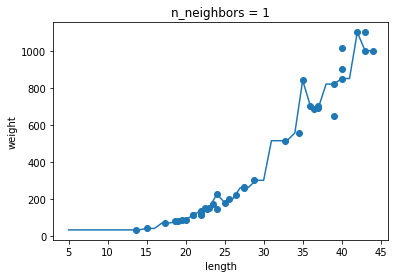

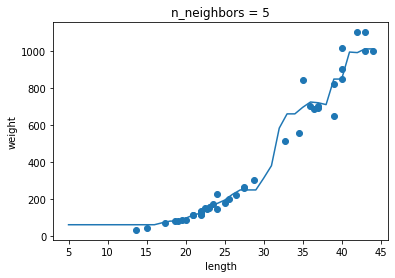

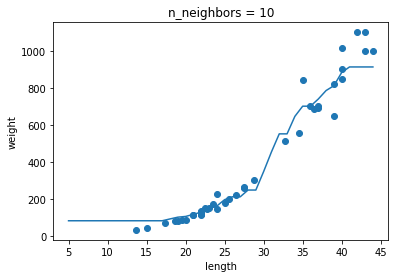

In [ ]:
# k-최근접 이웃 회귀 객체를 만든다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만든다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그린다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()